##  特徴抽出（Harris、AKAZE、ORB）

In [9]:
!pip install opencv-python
!pip install xfeatures2d

  Could not find a version that satisfies the requirement xfeatures2d (from versions: )
No matching distribution found for xfeatures2d


In [12]:
!pip install opencv3 --with-contrib --with-python3


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --with-contrib


In [2]:
from google.colab import files
uploaded = files.upload()

Saving lena.png to lena.png


In [0]:
import cv2
import numpy as np
import copy

In [0]:
img = cv2.imread("img/lena.png")
img_g = cv2.imread("img/lena.png", 0)

In [5]:
img_harris = copy.deepcopy(img)
img_dst = cv2.cornerHarris(img_g, 2, 3, 0.04)

error: ignored

In [0]:
img_dst

array([[ 1.1049196e-11,  1.1049196e-11,  2.3249497e-10, ...,
         9.7557513e-06,  8.5430045e-05,  2.4591092e-05],
       [ 1.1049196e-11,  1.1049196e-11,  2.3249497e-10, ...,
         9.7557513e-06,  8.5430045e-05,  2.4591092e-05],
       [ 2.2864258e-10,  2.2864258e-10,  1.6165081e-09, ...,
         2.1258455e-04,  1.5983678e-04, -7.7441422e-05],
       ...,
       [ 6.7322863e-09,  6.7322863e-09, -8.7553698e-10, ...,
        -1.9214519e-06, -9.2246710e-06,  1.0715471e-05],
       [ 8.7019334e-09,  8.7019334e-09,  2.0698376e-10, ...,
        -7.4428481e-06, -7.7686300e-06,  5.0912113e-06],
       [ 7.8018765e-09,  7.8018765e-09,  7.8520319e-09, ...,
         1.0704987e-05,  7.4965037e-06,  2.2587340e-06]], dtype=float32)

In [0]:
img_harris[img_dst > 0.05 * img_dst.max()] = [0, 0, 255]

In [0]:
cv2.imshow("img_harris", img_harris)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
img_kaze = copy.deepcopy(img)
akaze = cv2.AKAZE_create()
kp1 = akaze.detect(img, None)
img_kaze = cv2.drawKeypoints(img_kaze, kp1, None)
cv2.imshow("img_kaze", img_kaze)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
img_orb = copy.deepcopy(img)
orb= cv2.ORB_create()
kp2 = orb.detect(img, None)
img_orb = cv2.drawKeypoints(img_orb, kp2, None)
cv2.imshow("img_orb", img_orb)
cv2.waitKey(0)
cv2.destroyAllWindows()

## SIFT

In [0]:
img_bgr = cv2.imread('lena.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [8]:
sift = cv2.xfeatures2d.SIFT_create()

AttributeError: ignored

In [0]:
kp = sift.detect(img_bgr)

NameError: name 'sift' is not defined

In [0]:
import numpy as np
img_kp = np.zeros_like(img_bgr)
img_kp = cv2.drawKeypoints(img_rgb, kp, img_kp, 
                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

NameError: name 'kp' is not defined

In [0]:
plt.figure(figsize=(12, 6))
plt.imshow(img_kp)

NameError: name 'plt' is not defined

In [0]:
kp, des = sift.compute(img_bgr, kp)

In [0]:
des.shape

(238, 128)

In [0]:
kp2, des2 = sift.detectAndCompute(img_bgr, None)

In [0]:
des2.shape

(238, 128)

## SURF

In [0]:
surf = cv2.xfeatures2d.SURF_create()

error: OpenCV(3.4.3) C:\projects\opencv-python\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1016: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'


In [0]:
kp = surf.detect(img_bgr)

NameError: name 'surf' is not defined

In [0]:
img_kp = np.zeros_like(img_bgr)
img_kp = cv2.drawKeypoints(img_rgb, kp, img_kp,
                        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

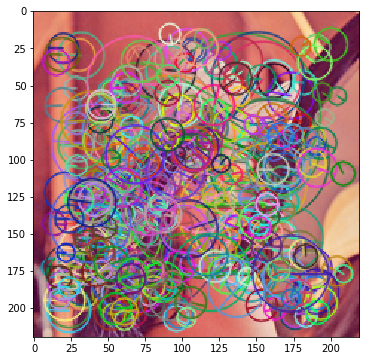

In [0]:
plt.figure(figsize=(12, 6))
plt.imshow(img_kp)

kp, des = surf.compute(img_bgr, kp)

In [0]:
des.shape

(362, 64)